In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelBinarizer as LB
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [19]:
dataset = pd.read_csv('Housing.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [20]:
dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
    #Encoding data that have different labels (Not only (yes,no))
le = LE()  # Label Encoding
for col in ['furnishingstatus']:
   dataset[col] = le.fit_transform(dataset[col])

In [23]:
#Encoding data that have only (yes,no)
lb = LB()  # Binary Encoding
for col in ['guestroom','basement','airconditioning','prefarea','hotwaterheating','mainroad']:
    dataset[col] = lb.fit_transform(dataset[col])

In [24]:
dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [25]:
col = dataset.columns

In [26]:
#Scalling the data
msc = MinMaxScaler()
data_scaled = msc.fit_transform(dataset)
data = pd.DataFrame(data_scaled,  columns=col)

In [27]:
#Spliting data into feateure and the data should be predicted
feature_cols = [x for x in data.columns if x != 'price']
x_data = data[feature_cols]
y_data = data['price']

#Spliting data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=50)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

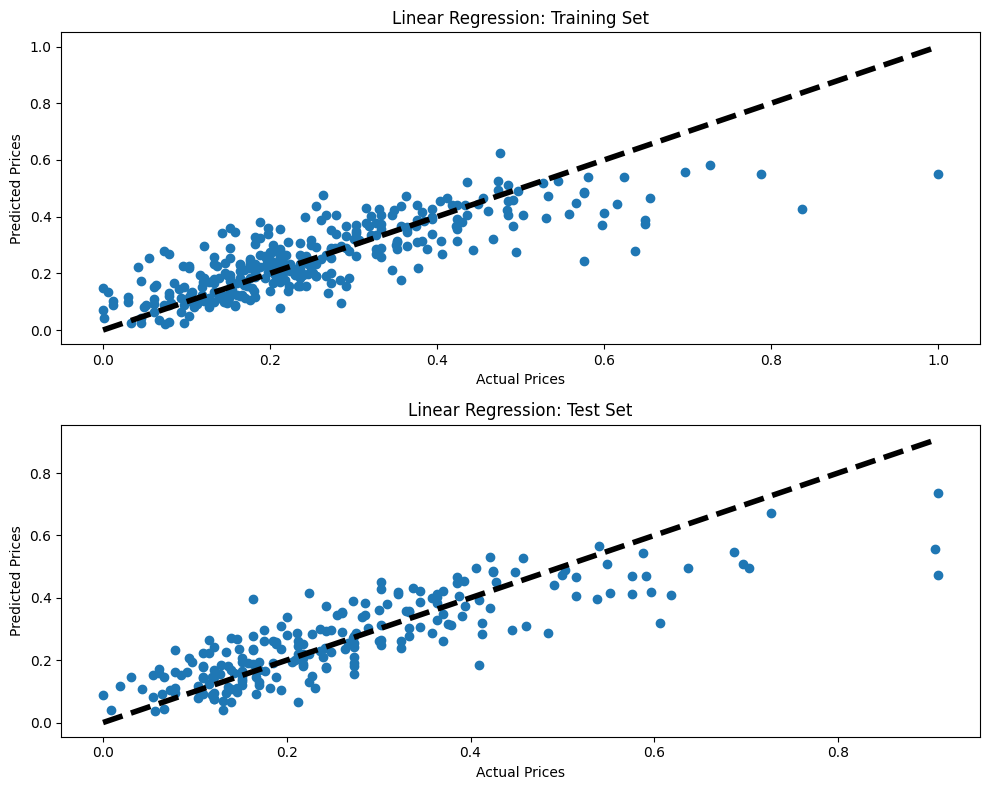

In [29]:
y_train_pred = regressor.predict(X_train)

# Predictions on the test set
y_test_pred = regressor.predict(X_test)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plotting for the training set
ax1.scatter(y_train, y_train_pred)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual Prices')
ax1.set_ylabel('Predicted Prices')
ax1.set_title('Linear Regression: Training Set')

# Plotting for the test set
ax2.scatter(y_test, y_test_pred)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax2.set_xlabel('Actual Prices')
ax2.set_ylabel('Predicted Prices')
ax2.set_title('Linear Regression: Test Set')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [30]:
# Create and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions on the test set
y_pred = linear_reg.predict(X_test)

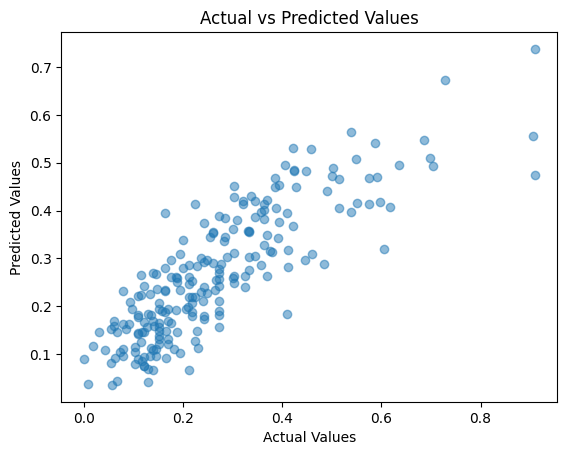

In [31]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [32]:
# R-squared (R²) value
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2:.4f}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

R-squared (R²): 0.7088
Mean Absolute Error (MAE): 0.0694
Root Mean Squared Error (RMSE): 0.0912
